# Task 3: Using 2 Clustering Algorithms on 2 different datasets
#### Algorithms:
- Agglmerative Clustering
- KModes CLustering

#### Datasets:
- Wisconsin Breast Cancer Dataset
- NASA KC2 Dataset

In [7]:
from utils.task3_utils import load_data, get_frequent_itemsets, make_cluster_df, task3

import warnings
warnings.filterwarnings('ignore')

# Agglomerative Clustering on Breast Cancer Dataset

Dataset: breast_cancer
Number of classes: 2
Number of freq-itemsets: 5

Running Task 3 for agglomerative

Accuracy after remap:	0.6784

Davies Bouldin Score:	1.5257
Silhouette Score:	0.3096


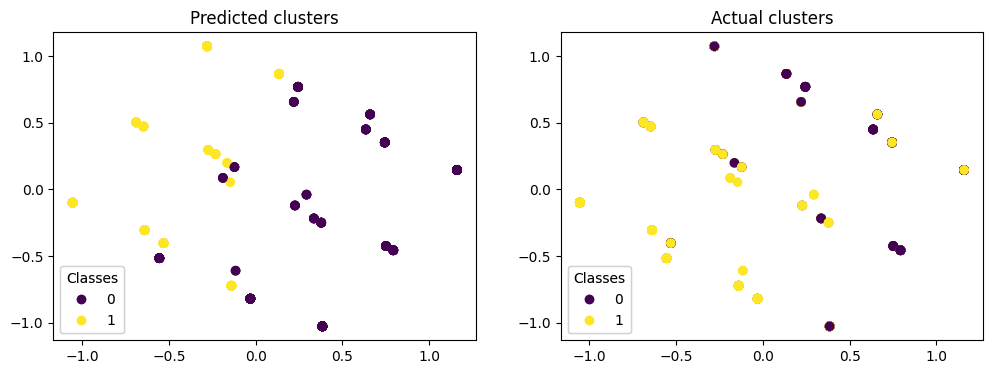

In [8]:
algo_name = 'agglomerative'
dataset_name = 'breast_cancer'

df, target, num_classes = load_data(name=dataset_name)
fi = get_frequent_itemsets(df, minsup=0.45)
df = make_cluster_df(df, fi) #converts the df such that the features are the freuent itemsets and the values are binary

print('Dataset: {}'.format(dataset_name))
print('Number of classes: {}'.format(num_classes))
print('Number of freq-itemsets: {}\n'.format(len(fi)))

# Run the Clustering algorithm and output the results plus visualization
task3(df, target, num_classes, algo_name)

# KModes Clustering on Breast Cancer Dataset

Dataset: breast_cancer
Number of classes: 2
Number of freq-itemsets: 5

Running Task 3 for kmodes

Accuracy after remap:	0.7540

Davies Bouldin Score:	1.5103
Silhouette Score:	0.3057


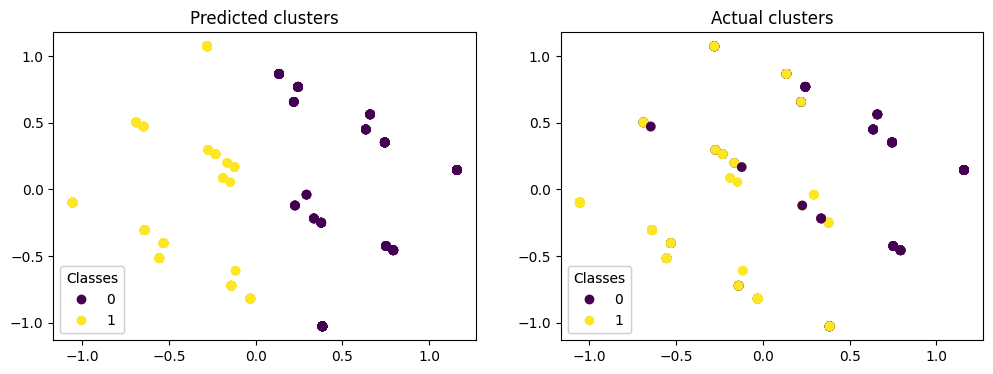

In [9]:
algo_name = 'kmodes'
dataset_name = 'breast_cancer'

df, target, num_classes = load_data(name=dataset_name)
fi = get_frequent_itemsets(df, minsup=0.45)
df = make_cluster_df(df, fi) #converts the df such that the features are the freuent itemsets and the values are binary

print('Dataset: {}'.format(dataset_name))
print('Number of classes: {}'.format(num_classes))
print('Number of freq-itemsets: {}\n'.format(len(fi)))

# Run the Clustering algorithm and output the results plus visualization
task3(df, target, num_classes, algo_name)

# Agglomerative Clustering on KC2 Dataset

Dataset: kc2
Number of classes: 2
Number of freq-itemsets: 5

Running Task 3 for agglomerative

Accuracy after remap:	0.7471

Davies Bouldin Score:	0.4895
Silhouette Score:	0.6959


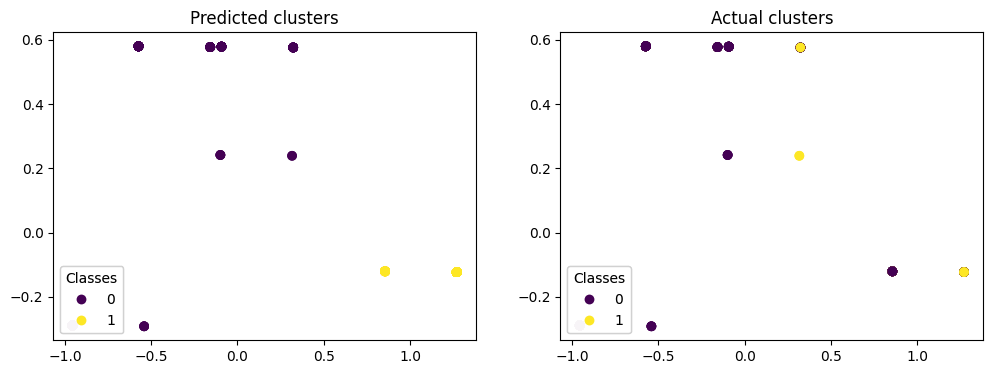

In [10]:
algo_name = 'agglomerative'
dataset_name = 'kc2'

df, target, num_classes = load_data(name=dataset_name)
fi = get_frequent_itemsets(df, minsup=0.35)
df = make_cluster_df(df, fi) #converts the df such that the features are the freuent itemsets and the values are binary

print('Dataset: {}'.format(dataset_name))
print('Number of classes: {}'.format(num_classes))
print('Number of freq-itemsets: {}\n'.format(len(fi)))

# Run the Clustering algorithm and output the results plus visualization
task3(df, target, num_classes, algo_name)

# KModes Clustering on KC2 Dataset

Dataset: kc2
Number of classes: 2
Number of freq-itemsets: 5

Running Task 3 for kmodes

Accuracy after remap:	0.7375

Davies Bouldin Score:	0.5230
Silhouette Score:	0.6921


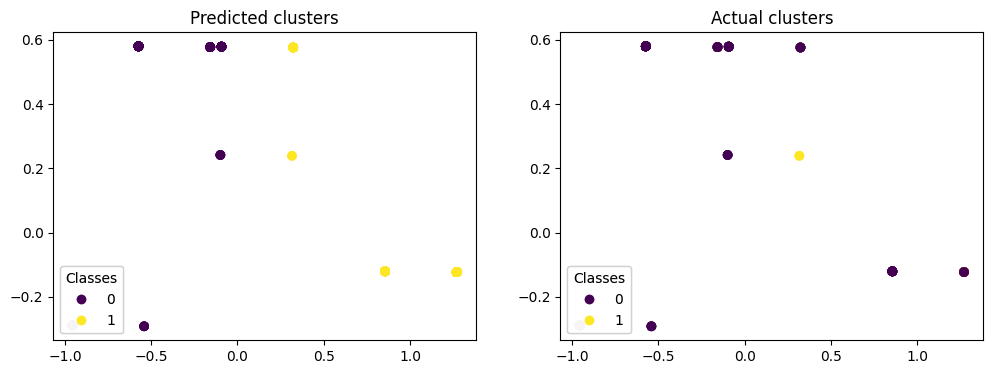

In [11]:
algo_name = 'kmodes'
dataset_name = 'kc2'

df, target, num_classes = load_data(name=dataset_name)
fi = get_frequent_itemsets(df, minsup=0.35)
df = make_cluster_df(df, fi) #converts the df such that the features are the freuent itemsets and the values are binary

print('Dataset: {}'.format(dataset_name))
print('Number of classes: {}'.format(num_classes))
print('Number of freq-itemsets: {}\n'.format(len(fi)))

# Run the Clustering algorithm and output the results plus visualization
task3(df, target, num_classes, algo_name)